# Support Vector Machines (SVM)

The total credits in this document are for: [SVM with Python | Support Vector Machines (SVM) Vector Machines Machine Learning | KGP Talkie](https://kgptalkie.com/svm-with-python-support-vector-machines-machine-learning-kgp-talkie/)

## Concept

### What is Support Vector Machines (SVM)

We will start out discussion with little introduction about **SVM**. Support Vector Machine is a supervised binary classification algorithm. Given a set of points of two types in *N-dimensional* place SVM generates a *(N-1) dimensional* hyperplane to separate those points into two groups.

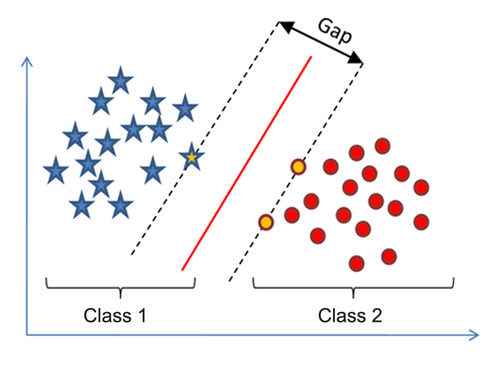

A SVM classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes.

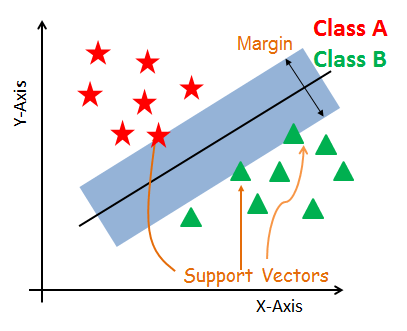

- Support Vectors
- Hyperplane
- Margin

#### Support Vectors

***Support Vectors*** are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

#### Hyperplane

A ***Hyperplane*** is a decision plane which separates between a set of objects having different class memberships.

#### Margin

A ***Margin*** is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

### How SVM works?

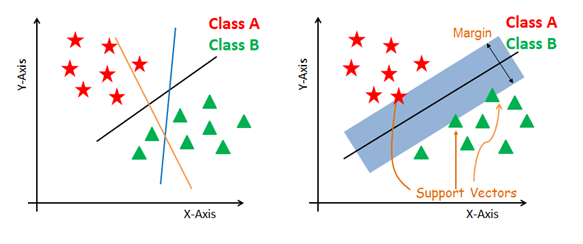

- Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly

- Select the right hyperplane with the maximun segregation from the either nearest data points as show in the right-hand side figure

### Separation Planes

- Linear
- Non-Linear

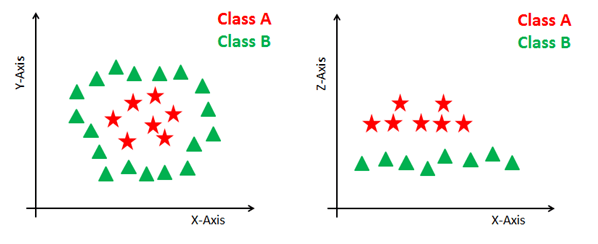

### Dealing with non-linear and inseparable planes

SVM uses a Kernel trick to transform the input space to a *higher dimensional* space.

#### Beauty of Kernel

kernels allow us to do stuff in infinite dimensions. Sometimes going to higher dimension is not just computationally expensive, but also impossible function can be a mapping from n-dimension to infinite dimension which we may have little idea of how to deal with. Then kernel gives us a wonderful shortcut.

#### SVM Kernels

- Linear
- Polynomial
- Radial Basis Function

The SVM algorithm is implemented in practice using a kernel. Kernel helps you to build a more accurate classifier.

- A linear Kernel can be used as normal *dot product* any two given observations. The product between *two vectors* is the sum of the *multiplication* of each pair of *input values*. Training a SVM with a Linear Kernel is Faster than with any other Kernel.

- A *polymonial kernel* is a more generalized form of the *linear kernel*. The polynomial kernel can distinguish curved or nonlinear *input space*

- The *Radial basis function (RBF)* kernel is a popular *kernel function* commonly used in Support Vector Machine classification. RBF can map an input space in *infinite dimensional* space.

## Exercise

### Let's Build Model in Sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer.feature_names[: 5]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'], dtype='<U23')

In [7]:
cancer.feature_names.shape

(30,)

In [8]:
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [29]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [31]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [32]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Let's print the slicing array of x, y

In [9]:
X[: 2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [10]:
y[: 10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Standardization

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The idea behind StandardScaler() is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[2:2]

array([], shape=(0, 30), dtype=float64)

### Split the data and build the model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

### Linear Kernel

Let's create a Linear Model SVM using the sklearn library of Python. Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. Its is one of the most common kernels to be used. Its is mostly used when there are a Large number of Features in a particular Data Set.

In [13]:
from sklearn import svm

In [14]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

print('Precision: ', metrics.precision_score(y_test, y_predict))

print('Recall: ', metrics.recall_score(y_test, y_predict))

Accuracy:  0.9912280701754386
Precision:  0.9863013698630136
Recall:  1.0


Confusion Matrix


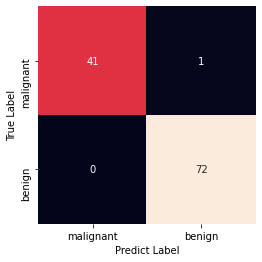

In [15]:
print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show()

### np.unique()

This function returns an *array of unique elements* in the input array. The function can be able to return a *tuple of array of unique vales* and an array of associated indices. Nature of the indices depend upon the type of return parameter in the function call.   
Let's see the following code:

In [16]:
element, count = np.unique(y_test, return_counts=True)
element, count

(array([0, 1]), array([42, 72]))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9649122807017544


### Polynomial Kernel

The *Polynomial kernel* is a *non-stationary* kernel. Polynomial kernels are well suited for problems where all the training data is normalized. In the case of this kernel, you also have to pass a value for the degree parameter of the SVC class. This basically is the degree of the polynomial.   
Take a look at how we can use a polynomial kernel to implement kernel SVM:

In [18]:
clf = svm.SVC(kernel='poly', degree=5, gamma=100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

print('Precision: ', metrics.precision_score(y_test, y_predict))

print('Recall: ', metrics.recall_score(y_test, y_predict))

Accuracy:  0.631578947368421
Precision:  0.631578947368421
Recall:  1.0


Confusion Matrix


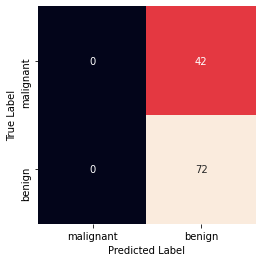

In [22]:
print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Sigmoidal Kernel

Finally, let's use a *sigmoid kernel* for implementing Kernel SVM. The sigmoid kernel was quite popular for support vector machines due to its origin from neural networks. To use the sigmoid kernel, you have to specify 'sigmoid' as value for the kernel parameter of the SVC class.  
Take a look at following script:

In [23]:
clf = svm.SVC(kernel='sigmoid', gamma=200, C=10000)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

print('Precision: ', metrics.precision_score(y_test, y_predict))

print('Recall: ', metrics.recall_score(y_test, y_predict))

Accuracy:  0.631578947368421
Precision:  0.631578947368421
Recall:  1.0


Confusion Matrix


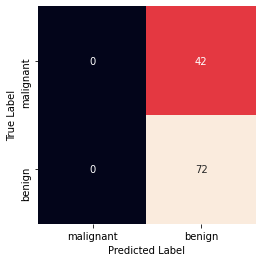

In [24]:
print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels=cancer.target_names,
           yticklabels=cancer.target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()